In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Data Preprocessing

### NB: Will only be loading half the images available in the dataset because
###  my RAM is low and all the Images could not be loaded in memory.😢

In [4]:
def loading_preprossing(path):
    img_list = []
    img_paths = os.listdir(path)
    total_imgs = len(img_paths)
    half_imgs = total_imgs // 6
    # Process only half the images cause my RAM is low
    # and I can not load all the available images in memory

    for img_path in img_paths[:half_imgs]:
        img = cv2.imread(path + '/' + img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (255, 255))
        img = img / 255
        img_list.append(img)
    return img_list

In [5]:
train_class1 = loading_preprossing('chest_xray/train/NORMAL')
train_class2 = loading_preprossing('chest_xray/train/PNEUMONIA')

In [6]:
train_labels = [0]*len(train_class1) + [1] * len(train_class2)

In [7]:
train_list = train_class1 + train_class2

In [8]:
print("length of train data")
print("length of data is ",len(train_list))
print("length of labels is ",len(train_labels))

length of train data
length of data is  868
length of labels is  868


In [9]:
test_class1 = loading_preprossing('chest_xray/test/NORMAL')
test_class2 = loading_preprossing('chest_xray/test/PNEUMONIA')

In [10]:
test_labels = [0]*len(test_class1) + [1] * len(test_class2)

In [11]:
test_list = test_class1 + test_class2

In [12]:
print("length of test data")
print("length of data is ",len(test_list))
print("length of labels is ",len(test_labels))

length of test data
length of data is  104
length of labels is  104


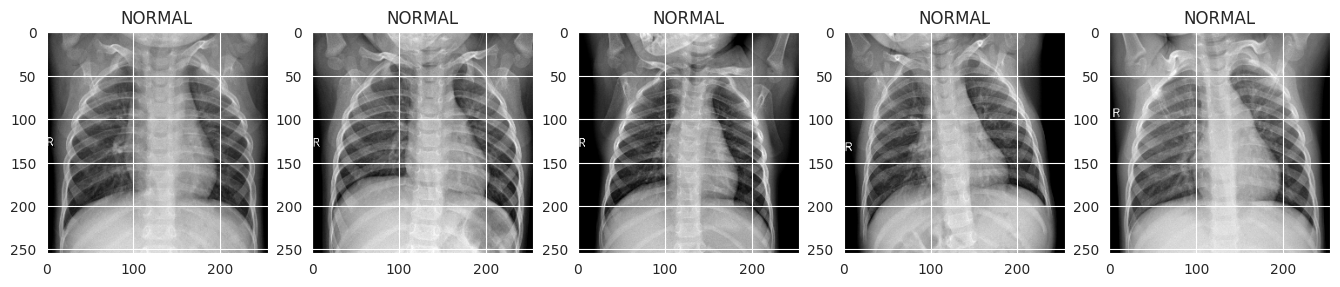

In [12]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[:5], train_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

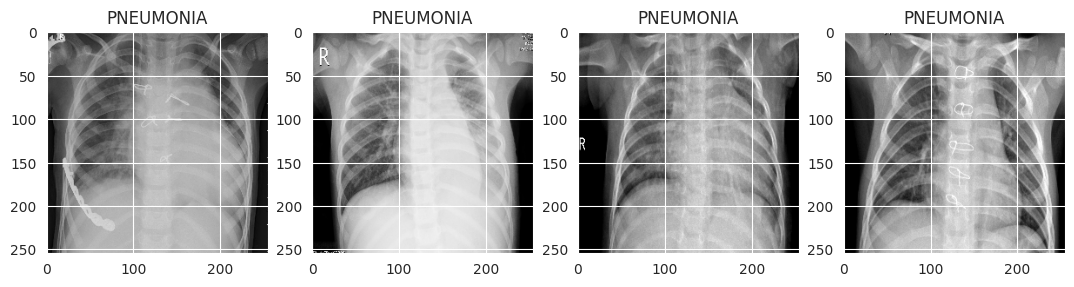

In [13]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[-5:-1], train_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

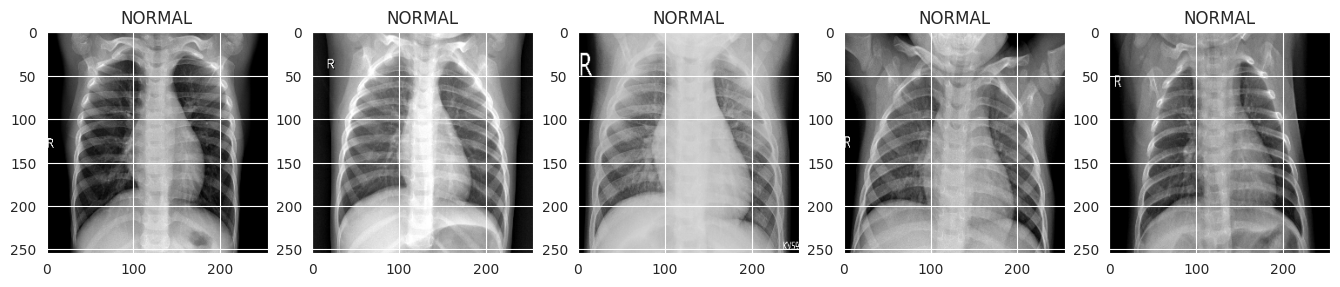

In [14]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[:5], test_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

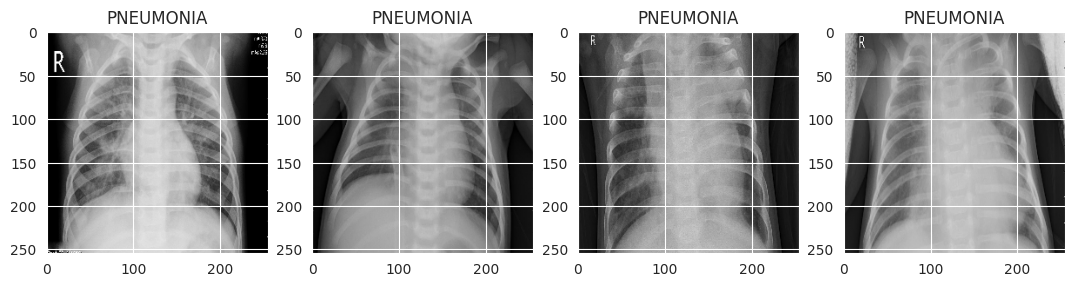

In [15]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], test_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

In [13]:
X_train = np.array(train_list)
X_test = np.array(test_list)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import utils
from sklearn.metrics import precision_score



In [15]:
y_train = utils.to_categorical(train_labels,num_classes = 2)
y_test = utils.to_categorical(test_labels,num_classes = 2)

In [16]:
y_train.shape

(868, 2)

In [17]:
y_test.shape

(104, 2)

# Model Building

In [21]:
model =  Sequential()
model.add(layers.Conv2D(32,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu',input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(16,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

/home/dan/Projects/alu-machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-21 23:31:06.245538: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 63504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,064,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,070,914 (15.53 MB)

 Trainable params: 4,070,914 (15.53 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

2025-02-21 23:31:23.404252: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 677300400 exceeds 10% of free system memory.


Epoch 1/10


2025-02-21 23:31:40.678766: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2025-02-21 23:31:40.679077: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2025-02-21 23:31:40.679445: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2025-02-21 23:31:40.682258: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.


28/28 ━━━━━━━━━━━━━━━━━━━━ 175s 6s/step - accuracy: 0.6912 - loss: 1.3100 - val_accuracy: 0.8269 - val_loss: 0.3932
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 181s 5s/step - accuracy: 0.8837 - loss: 0.3157 - val_accuracy: 0.7212 - val_loss: 0.6111
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.9197 - loss: 0.2210 - val_accuracy: 0.7692 - val_loss: 0.6294
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.9435 - loss: 0.1498 - val_accuracy: 0.7885 - val_loss: 0.6252
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.9474 - loss: 0.1208 - val_accuracy: 0.7500 - val_loss: 0.8257
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.9870 - loss: 0.0466 - val_accuracy: 0.7212 - val_loss: 0.9810
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.9846 - loss: 0.0727 - val_accuracy: 0.7404 - val_loss: 1.0383
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.9941 - loss: 0.0309 - val_accuracy: 0.7500 - val_loss: 1.

In [24]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Model Evaluation and Experimentation

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [26]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

In [27]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [28]:
print(f'Precision: {precision:.2f}')

Precision: 0.70


In [29]:
print(f'Recall: {recall:.2f}')

Recall: 1.00


In [30]:
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.82


In [31]:
cm = confusion_matrix(test_labels, y_pred)

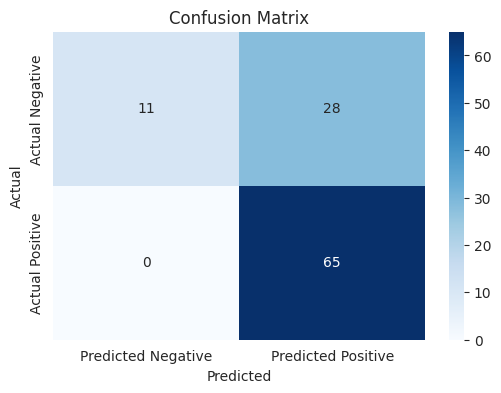

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

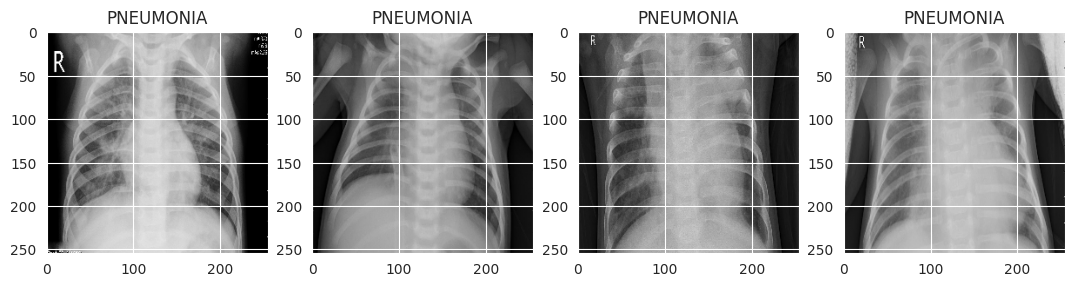

In [33]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], y_pred[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

In [ ]:
# saving model
model.save('models/CNN_model.h5')


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define a basic neural network model
basic_model = Sequential()

# Input Layer
basic_model.add(Flatten(input_shape=X_train[0].shape))  # Flatten input image data to feed into Dense layers

# Hidden Layer
basic_model.add(Dense(32, activation='relu'))  # A single hidden layer with 32 neurons and ReLU activation

# Output Layer
basic_model.add(Dense(2, activation='softmax'))  # Final output layer with 2 neurons (for classification) and softmax activation

# Compile model
basic_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])  # Using SGD optimizer for simplicity

# Train model with training data
basic_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))  # Training with a batch size of 32

# Evaluate model and print results
test_loss, test_accuracy = basic_model.evaluate(X_test, y_test)
print(f"Basic Model Test Accuracy: {test_accuracy:.2f}")

# saving model
basic_model.save('models/basic_model.h5')

/home/dan/Projects/alu-machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-23 17:51:28.990304: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-02-23 17:51:29.441035: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2025-02-23 17:51:29.646561: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2025-02-23 17:51:29.746721: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2025-02-23 17:51:44.182918: W exter

Epoch 1/10


2025-02-23 17:52:02.211985: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.


28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 328ms/step - accuracy: 0.6911 - loss: 2.0359 - val_accuracy: 0.6250 - val_loss: 0.6865
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.7670 - loss: 0.6709 - val_accuracy: 0.6250 - val_loss: 0.6750
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.7171 - loss: 0.6543 - val_accuracy: 0.6250 - val_loss: 0.6681
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.7410 - loss: 0.6321 - val_accuracy: 0.6250 - val_loss: 0.6640
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.7651 - loss: 0.6091 - val_accuracy: 0.6250 - val_loss: 0.6621
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.7393 - loss: 0.6090 - val_accuracy: 0.6250 - val_loss: 0.6616
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.7666 - loss: 0.5861 - val_accuracy: 0.6250 - val_loss: 0.6621
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.7427 - loss: 0.5926 - val_accuracy: 0.6250 - val

Basic Model Test Accuracy: 0.62


In [23]:
y_pred_classes = (basic_model.predict(X_test) > 0.5)
precision = precision_score(y_test, y_pred_classes, average='weighted')

print("Precision:", precision)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Precision: 0.390625


/home/dan/Projects/alu-machine_learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.72
SVM Precision: 0.70
SVM Recall: 0.98
SVM F1 Score: 0.82


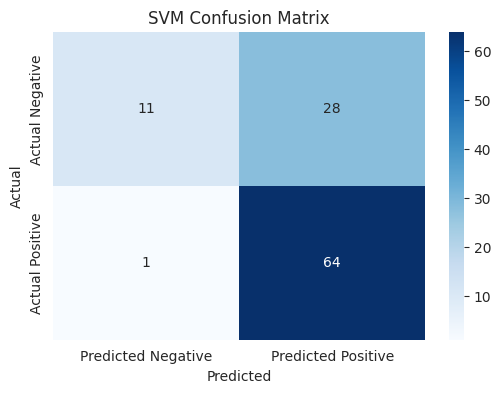

Logistic Regression Accuracy: 0.73
Logistic Regression Precision: 0.71
Logistic Regression Recall: 0.97
Logistic Regression F1 Score: 0.82


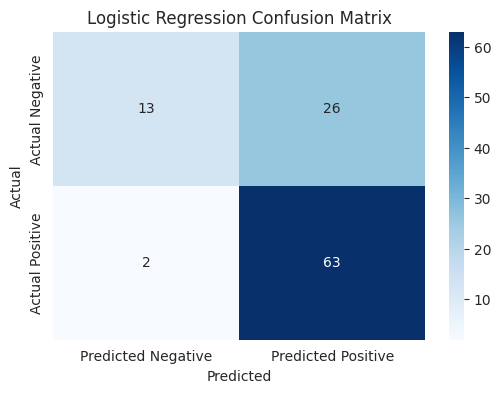

In [22]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Flatten the 3D image data
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# SVM Hyperparameter Tuning and Evaluation
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train_flatten, train_labels)
best_svm = grid_search.best_estimator_
svm_preds = best_svm.predict(X_test_flatten)

svm_accuracy = accuracy_score(test_labels, svm_preds)
svm_precision = precision_score(test_labels, svm_preds)
svm_recall = recall_score(test_labels, svm_preds)
svm_f1 = f1_score(test_labels, svm_preds)
svm_cm = confusion_matrix(test_labels, svm_preds)

print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM Precision: {svm_precision:.2f}')
print(f'SVM Recall: {svm_recall:.2f}')
print(f'SVM F1 Score: {svm_f1:.2f}')

plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Logistic Regression Training and Evaluation
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flatten, train_labels)
log_reg_preds = log_reg.predict(X_test_flatten)

log_reg_accuracy = accuracy_score(test_labels, log_reg_preds)
log_reg_precision = precision_score(test_labels, log_reg_preds)
log_reg_recall = recall_score(test_labels, log_reg_preds)
log_reg_f1 = f1_score(test_labels, log_reg_preds)
log_reg_cm = confusion_matrix(test_labels, log_reg_preds)

print(f'Logistic Regression Accuracy: {log_reg_accuracy:.2f}')
print(f'Logistic Regression Precision: {log_reg_precision:.2f}')
print(f'Logistic Regression Recall: {log_reg_recall:.2f}')
print(f'Logistic Regression F1 Score: {log_reg_f1:.2f}')

plt.figure(figsize=(6, 4))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [23]:
# saving the other model

import pickle

with open('models/best_svm.pkl', 'wb') as f:
    pickle.dump(best_svm, f)

with open('models/log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)
